In [1]:
import sys
sys.path.insert(0, '/Users/sze/project-lorentz/cs229-beam-steering')

# Force reload of modules
import importlib
if 'src.training' in sys.modules:
    del sys.modules['src.training']
if 'src' in sys.modules:
    del sys.modules['src']

import numpy as np
from src.training import ESAgent, ES_CONFIG

print("✓ Imports successful (modules reloaded)")

✓ Imports successful (modules reloaded)


## 1. Test Configuration

Create a small test config with N=20 and 5 iterations.

In [2]:
# Test config: smaller N and fewer iterations for quick validation
test_config = ES_CONFIG.copy()
test_config['N'] = 20  # Smaller population
test_config['n_iterations'] = 5  # Just 5 iterations
test_config['log_every'] = 2  # Log every 2 iterations

print("Test Configuration:")
for key, val in test_config.items():
    print(f"  {key:20s}: {val}")

Test Configuration:
  N                   : 20
  sigma_0             : 0.3
  sigma_decay         : 0.999
  eta                 : 0.02
  beta_1              : 0.9
  beta_2              : 0.999
  adam_eps            : 1e-08
  clip_norm           : None
  lambda_crosstalk    : 0.5
  n_iterations        : 5
  log_every           : 2
  frequency_hz        : 6000000000.0


## 2. Initialize ES Agent

Create an ESAgent for target angle 90° (straight-through receiver).

In [3]:
# Initialize agent
target_angle = 90  # Straight-through receiver on the right
agent = ESAgent(
    target_angle=target_angle,
    config=test_config,
    output_dir='./test_es_outputs'
)

print(f"Initialized ES Agent for {target_angle}° target")
print(f"Output directory: {agent.output_dir}")
print(f"Initial best reward: {agent.reward_best}")

Initialized ES Agent for 90° target
Output directory: test_es_outputs
Initial best reward: -inf


## 3. Run Training

Run the short 5-iteration training loop.

In [4]:
# Run training
best_rho, best_reward = agent.train(verbose=True)

print(f"\nTraining complete!")
print(f"Best reward: {best_reward:.4e}")
print(f"Rod config shape: {best_rho.shape}")
print(f"Rod config range: [{best_rho.min():.4f}, {best_rho.max():.4f}]")

Starting ES training for target angle 90°
Population: N=20, σ₀=0.3, decay=0.999
Adam: η=0.02, β₁=0.9, β₂=0.999
Reward: R = P_target − λ * Σ P_other (λ=0.5)
Output: test_es_outputs

[   1/5] ( 20.0%) Sampling population...
[   1/5] ( 20.0%) Sampling population... [5/20] [5/20] [10/20] [10/20] [15/20] [15/20] [20/20] Done
  → Computing ES gradient (rank-weighted perturbations)... ||g||=3.4011e+01
  → Applying Adam update... [20/20] Done
  → Computing ES gradient (rank-weighted perturbations)... ||g||=3.4011e+01
  → Applying Adam update... ||Δθ||=1.6000e-01
 ||Δθ||=1.6000e-01
  Summary: R_best=2.737e+03 → | R_pop=4.761e+03±4.40e+04 | P_target=4.801e+03 | crosstalk=0.860 | σ=3.0000e-01

[   2/5] ( 40.0%) Sampling population...  Summary: R_best=2.737e+03 → | R_pop=4.761e+03±4.40e+04 | P_target=4.801e+03 | crosstalk=0.860 | σ=3.0000e-01

[   2/5] ( 40.0%) Sampling population... [5/20] [5/20] [10/20] [10/20] [15/20] [15/20] [20/20] Done
  → Computing ES gradient (rank-weighted perturbations).

## 4. Inspect History

Check the training history and plot it.

In [5]:
# Print history summary
print("Training History Summary:")
print(f"  Iterations: {len(agent.history['iteration'])}")
print(f"  Reward (best): {agent.history['reward_best']}")
print(f"  Reward (mean): {agent.history['reward_mean']}")
print(f"  Power target: {agent.history['power_target']}")
print(f"  Crosstalk ratio: {agent.history['crosstalk_ratio']}")

Training History Summary:
  Iterations: 5
  Reward (best): [np.float64(2736.5314086263124), np.float64(15745.248999952597), np.float64(30093.733807166136), np.float64(30093.733807166136), np.float64(38284.171975095414)]
  Reward (mean): [np.float64(4761.129053937324), np.float64(5248.359315633397), np.float64(60420.68955644374), np.float64(44162.51070941983), np.float64(28752.719331391487)]
  Power target: [np.float64(4801.451619391703), np.float64(19317.08127802758), np.float64(35675.84317671118), np.float64(392504.99265366804), np.float64(44600.979879676364)]
  Crosstalk ratio: [np.float64(0.8601233020554713), np.float64(0.36981076247143024), np.float64(0.31293496509083163), np.float64(0.05614137810841758), np.float64(0.2832587051505285)]


In [6]:
# Print top-K best configurations found
agent.print_top_k_summary()

# Retrieve and inspect a specific top-k configuration
print("Example: Loading rank-3 configuration:")
rank_3_rho = agent.get_top_k_config(rank=3)
print(f"  Shape: {rank_3_rho.shape}")
print(f"  Value range: [{rank_3_rho.min():.4f}, {rank_3_rho.max():.4f}]")
print(f"  Mean: {rank_3_rho.mean():.4f}")


TOP-5 CONFIGURATIONS
Rank   Reward          Iteration    ρ Range              ρ Mean    
--------------------------------------------------------------------------------
1      3.828417e+04    4            [0.0000, 0.9833]     0.5038    
2      3.009373e+04    2            [0.0000, 0.9891]     0.5061    
3      2.868803e+04    3            [0.0000, 0.9837]     0.5049    
4      1.574525e+04    1            [0.0003, 0.9862]     0.5065    
5      2.736531e+03    0            [0.0039, 1.0000]     0.5079    

Example: Loading rank-3 configuration:
  Shape: (8, 8)
  Value range: [0.0000, 0.9837]
  Mean: 0.5049


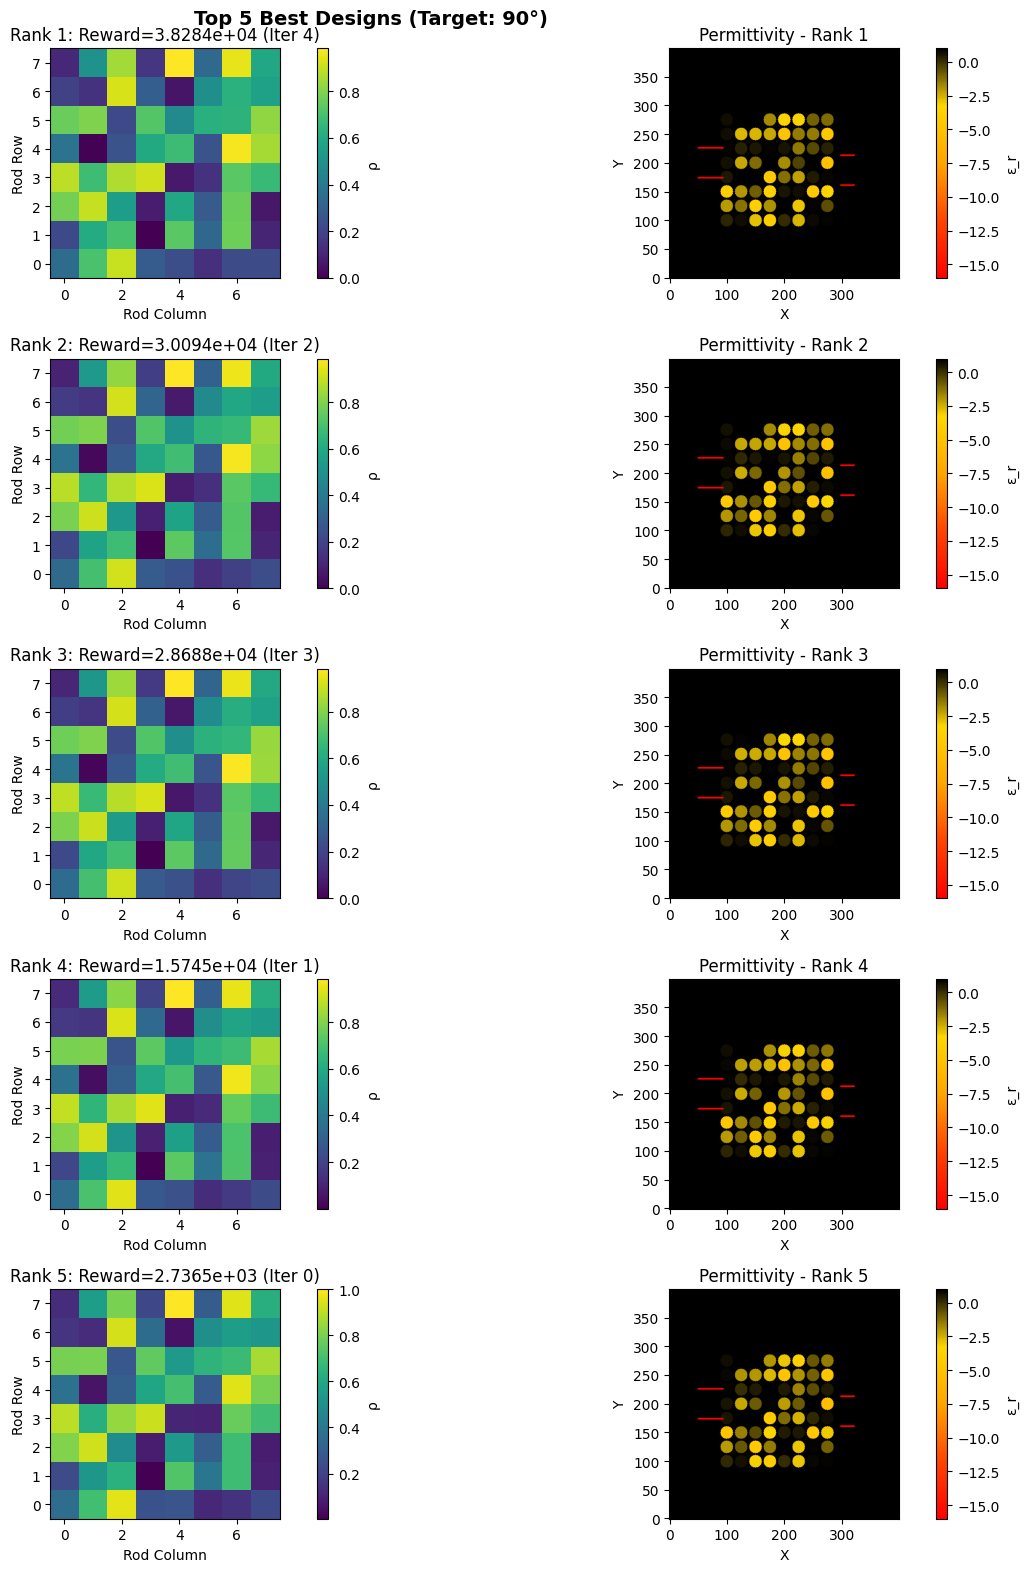

✓ Top 5 designs visualized with consistent visualization module colormaps


In [14]:
import matplotlib.pyplot as plt
from src.visualization import plot_rod_pattern, plot_permittivity
from src.simulation import rods_to_permittivity, add_source_waveguide, add_receiver_waveguide, run_simulation

# Display top 5 best designs using visualization module colormaps
fig, axes = plt.subplots(5, 2, figsize=(14, 16))
fig.suptitle(f'Top 5 Best Designs (Target: {agent.target_angle}°)', fontsize=14, fontweight='bold')

for rank in range(1, 6):
    # Get the top-k configuration
    top_k_rho = agent.get_top_k_config(rank)
    reward = agent.top_k_configs[rank - 1]['reward']
    iteration = agent.top_k_configs[rank - 1]['iteration']
    
    # Plot rod pattern (left column) - use viridis for ρ
    ax_rod = axes[rank - 1, 0]
    im_rod = ax_rod.imshow(top_k_rho, cmap='viridis', origin='lower')
    ax_rod.set_title(f'Rank {rank}: Reward={reward:.4e} (Iter {iteration})')
    ax_rod.set_xlabel('Rod Column')
    ax_rod.set_ylabel('Rod Row')
    plt.colorbar(im_rod, ax=ax_rod, label='ρ')
    
    # Plot permittivity (right column) - use the visualization module's EPS_CMAP
    eps_r = rods_to_permittivity(top_k_rho)
    eps_r = add_source_waveguide(eps_r)
    eps_r = add_receiver_waveguide(eps_r, agent.target_angle)
    
    # Use the same colormap and clipping as the visualization module
    from src.visualization import EPS_CMAP
    eps_display = np.clip(eps_r, -16, 1)
    
    ax_eps = axes[rank - 1, 1]
    im_eps = ax_eps.imshow(eps_display.T, origin='lower', cmap=EPS_CMAP, vmin=-16, vmax=1)
    ax_eps.set_title(f'Permittivity - Rank {rank}')
    ax_eps.set_xlabel('X')
    ax_eps.set_ylabel('Y')
    plt.colorbar(im_eps, ax=ax_eps, label='ε_r')

plt.tight_layout()
plt.show()

print("✓ Top 5 designs visualized with consistent visualization module colormaps")

In [15]:
# Check if the top-5 configs are actually different or just visually similar
print("\nDetailed comparison of top-5 configurations:")
print("="*80)

for rank in range(1, 6):
    config = agent.top_k_configs[rank - 1]
    rho = config['rho']
    print(f"\nRank {rank}:")
    print(f"  Reward: {config['reward']:.6e}")
    print(f"  Iteration found: {config['iteration']}")
    print(f"  ρ statistics: min={rho.min():.6f}, max={rho.max():.6f}, mean={rho.mean():.6f}, std={rho.std():.6f}")
    print(f"  ρ as flattened array (first 10 values): {rho.flatten()[:10]}")

# Compute pairwise distances between top-5 configs
print("\n" + "="*80)
print("Pairwise Euclidean distances between top-5 configs:")
print("="*80)
distances = np.zeros((5, 5))
for i in range(5):
    for j in range(5):
        rho_i = agent.top_k_configs[i]['rho'].flatten()
        rho_j = agent.top_k_configs[j]['rho'].flatten()
        distances[i, j] = np.linalg.norm(rho_i - rho_j)

print("Distance matrix (Rank i × Rank j):")
print("     Rank1    Rank2    Rank3    Rank4    Rank5")
for i in range(5):
    print(f"R{i+1}: ", end="")
    for j in range(5):
        print(f"{distances[i, j]:8.4f} ", end="")
    print()

# Interpretation
avg_distance = np.mean(distances[np.triu_indices_from(distances, k=1)])
print(f"\nAverage pairwise distance: {avg_distance:.4f}")
if avg_distance < 1.0:
    print("→ Configs are VERY similar (distance < 1.0)")
elif avg_distance < 5.0:
    print("→ Configs are somewhat similar (1.0 ≤ distance < 5.0)")
else:
    print("→ Configs are quite different (distance ≥ 5.0)")


Detailed comparison of top-5 configurations:

Rank 1:
  Reward: 3.828417e+04
  Iteration found: 4
  ρ statistics: min=0.000000, max=0.983251, mean=0.503836, std=0.296392
  ρ as flattened array (first 10 values): [0.34688814 0.70269665 0.90025097 0.28484102 0.23790244 0.13822414
 0.22553859 0.22389525 0.21573576 0.60667248]

Rank 2:
  Reward: 3.009373e+04
  Iteration found: 2
  ρ statistics: min=0.000000, max=0.989115, mean=0.506114, std=0.295156
  ρ as flattened array (first 10 values): [0.34226223 0.6963842  0.92300608 0.28954009 0.25066576 0.13426313
 0.18662304 0.23791219 0.21636757 0.5718797 ]

Rank 3:
  Reward: 2.868803e+04
  Iteration found: 3
  ρ statistics: min=0.000000, max=0.983707, mean=0.504869, std=0.296033
  ρ as flattened array (first 10 values): [0.34443531 0.69474161 0.91319065 0.28348605 0.24439012 0.13318841
 0.20608625 0.23303198 0.21837857 0.58873155]

Rank 4:
  Reward: 1.574525e+04
  Iteration found: 1
  ρ statistics: min=0.000268, max=0.986245, mean=0.506518, st

## 5. Plot Training History

Visualize the training curves.

Saved history plot: test_es_outputs/test_history.png


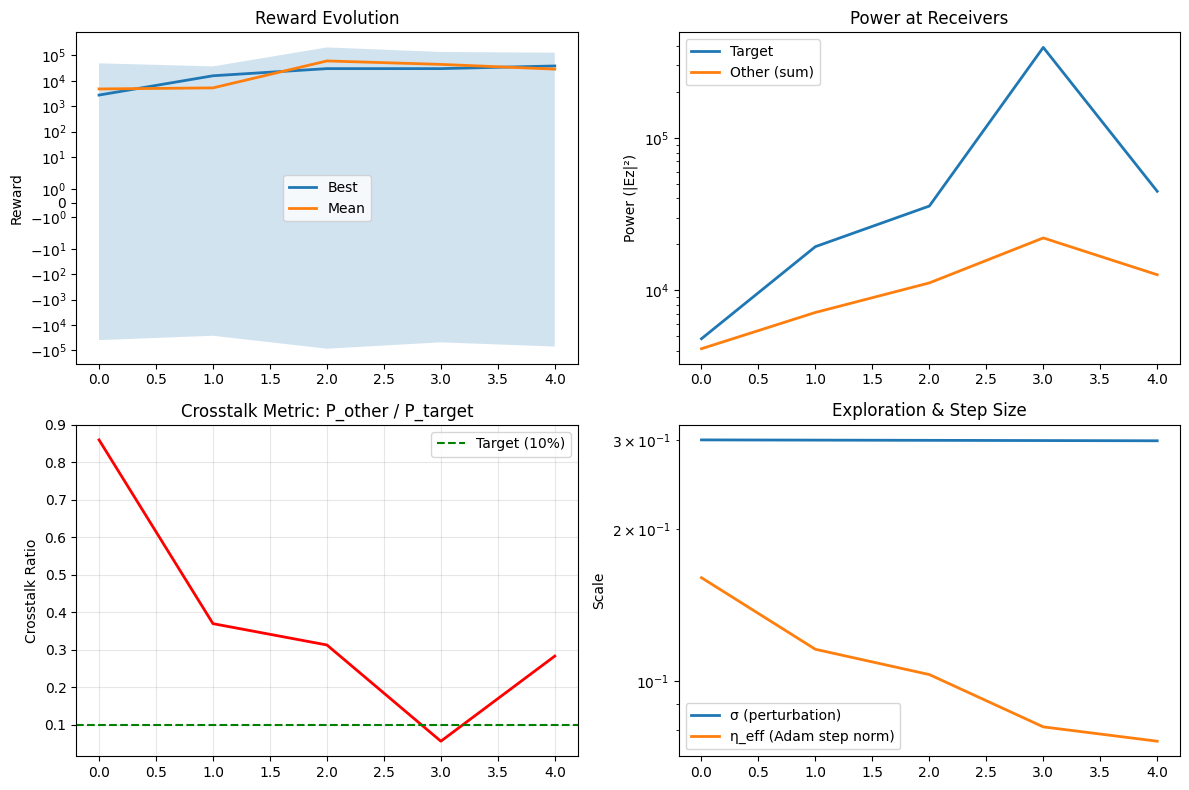

In [7]:
# Plot history
agent.plot_history(save_path=str(agent.output_dir / 'test_history.png'))

## 6. Verify Checkpoints

List the saved checkpoints.

In [8]:
import os
from pathlib import Path

output_path = Path(agent.output_dir)
checkpoints = sorted([d for d in output_path.iterdir() if d.is_dir()])

print(f"Saved checkpoints ({len(checkpoints)}):")
for ckpt in checkpoints:
    files = list(ckpt.iterdir())
    print(f"  {ckpt.name}: {[f.name for f in files]}")

Saved checkpoints (3):
  checkpoint_00001: ['best_eps_r.npy', 'best_Ez.npy', 'metadata.json', 'best_rho.npy', 'top_k_summary.json', 'top_k_configs']
  checkpoint_00003: ['best_eps_r.npy', 'best_Ez.npy', 'metadata.json', 'best_rho.npy', 'top_k_summary.json', 'top_k_configs']
  checkpoint_00004: ['best_eps_r.npy', 'best_Ez.npy', 'metadata.json', 'best_rho.npy', 'top_k_summary.json', 'top_k_configs']


## 7. Load Final Configuration

Load the best rod configuration from the final checkpoint.

In [9]:
# Load the best rho from the last checkpoint
final_checkpoint = sorted(output_path.glob('checkpoint_*'))[-1]
best_rho_loaded = np.load(final_checkpoint / 'best_rho.npy')
best_eps_r_loaded = np.load(final_checkpoint / 'best_eps_r.npy')
best_Ez_loaded = np.load(final_checkpoint / 'best_Ez.npy')

print(f"Loaded from {final_checkpoint.name}:")
print(f"  best_rho shape: {best_rho_loaded.shape}, range: [{best_rho_loaded.min():.4f}, {best_rho_loaded.max():.4f}]")
print(f"  best_eps_r shape: {best_eps_r_loaded.shape}")
print(f"  best_Ez shape: {best_Ez_loaded.shape}")

Loaded from checkpoint_00004:
  best_rho shape: (8, 8), range: [0.0000, 0.9833]
  best_eps_r shape: (400, 400)
  best_Ez shape: (400, 400)


## 8. Visualize Final Configuration (Optional)

If you have matplotlib, visualize the rod pattern.

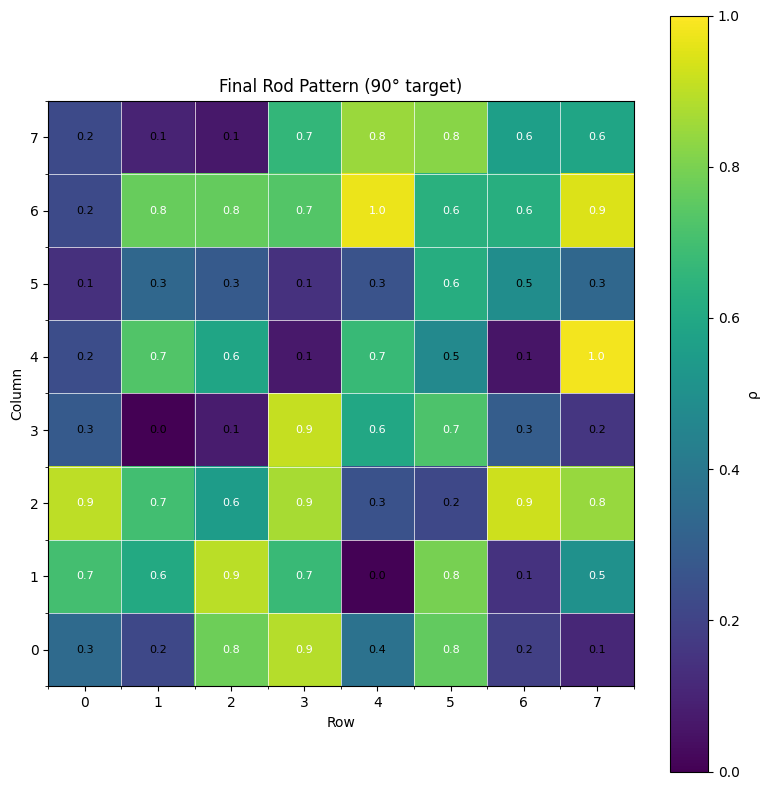

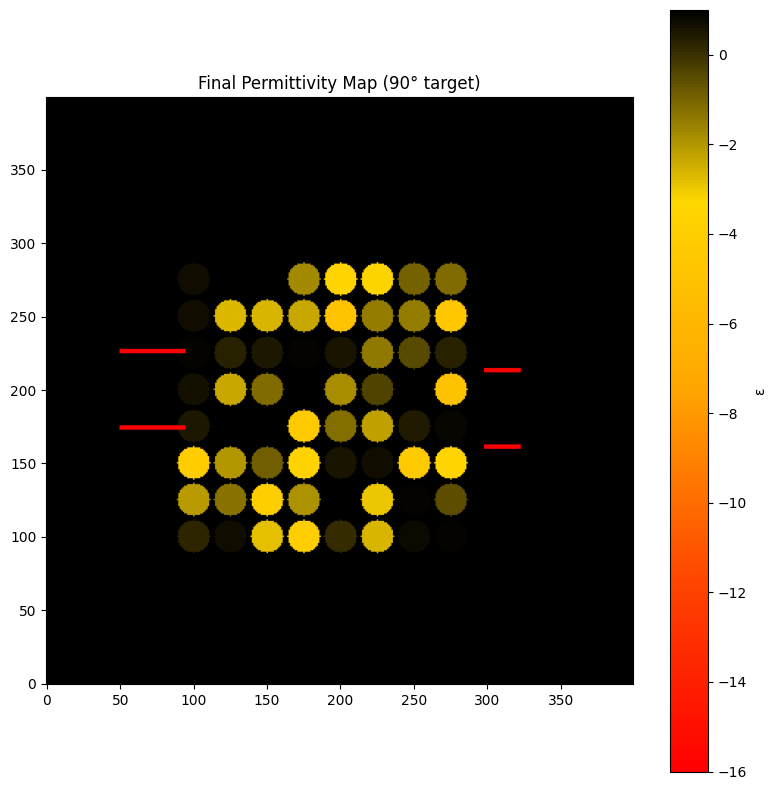

Plots displayed successfully


In [10]:
try:
    import matplotlib.pyplot as plt
    from src.visualization import plot_rod_pattern, plot_permittivity
    
    # Plot rod pattern
    fig1 = plot_rod_pattern(best_rho_loaded, title=f"Final Rod Pattern (90° target)")
    
    # Plot permittivity
    fig2 = plot_permittivity(best_eps_r_loaded, title=f"Final Permittivity Map (90° target)")
    
    print("Plots displayed successfully")
except ImportError as e:
    print(f"Could not import visualization: {e}")

## Summary

✓ ES agent initialization  
✓ Training loop (5 iterations)  
✓ Checkpoint saving (metadata, rho, eps_r, Ez)  
✓ History logging and plotting  
✓ Configuration reload  

If all cells above executed without errors, the ES agent is ready for production runs!

### Next steps:
1. Increase `n_iterations` to 1000 and `N` to 100 for production
2. Run on AWS for all three angles (0°, 90°, 180°)
3. Inspect final checkpoints and training curves
4. Collect data for ES+NN training